# Apprendre à utiliser et visualiser un Dataset Synthetic

A la fin de ce workshop vous saurez:

- Adopter un workflow de base avec GitHub (Develop, Verify, Commit)
- Générer un dataset synthetic de classification 2D avec la librairie sklearn
- Visualiser les classes du dataset sur un graphique 2D
- Visualiser les prédictions de votre réseau de neurones sur un graphique 2D.
- (BONUS) Introduction au Refactoring: vous refactoriserez un code jupyter pour en faire une fonction réutilisable.

In [1]:
# Importer les libraries utiles

import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles, make_classification

In [11]:
# Créer un dataset séparable par une ligne droite en 2D

train_size = 100
test_size  =  50

total_size = train_size + test_size 

print("Total Size : ", total_size)

X, y = make_classification(n_samples=total_size,
                          n_features=2, n_redundant=0, n_informative=2,
                          random_state=1, n_clusters_per_class=1)

Total Size :  150


In [5]:
X.shape, y.shape

((150, 2), (150,))

In [6]:
y = y.reshape(-1, 1)

y.shape

(150, 1)

In [7]:
X[:10], y[:10]

(array([[ 0.05065666, -1.04565042],
        [ 1.89212817,  0.14141529],
        [ 2.07731874, -1.10588188],
        [-0.21268004,  1.55015655],
        [ 1.33003867, -0.93929107],
        [ 0.9684331 , -1.14497058],
        [-0.12252602, -0.92897868],
        [-2.11442959, -0.72665594],
        [ 1.30958609, -1.03968501],
        [ 1.22239591, -1.00761238]]), array([[1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]]))

In [8]:
# Séparer en train / test

X_train, y_train = (X[:train_size], y[:train_size])
X_test , y_test  = (X[-test_size:], y[-test_size:])

assert X_test.shape[0] + X_train.shape[0] == total_size
assert y_test.shape[0] + y_train.shape[0] == total_size

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 2) (100, 1)
(50, 2) (50, 1)


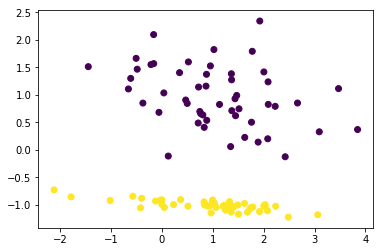

In [12]:
# Visualiser le dataset d'une manière informative

plt.scatter(X_train[:, 0], X_train[:, 1],
           c=y_train[:, 0],
           cmap=plt.)